In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import time
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import matplotlib.pylab as plt

In [11]:
filenames = os.listdir('../Datasets/dataset/Ungrouped')

categories = []
for filename in filenames:
    category = filename.split(' ')[0]
    if category == 'a': 
        categories.append(0)  
    elif category == 'b': 
        categories.append(1)
    elif category == 'ba':
        categories.append(2)
    elif category == 'be_bi':
        categories.append(3)
    elif category == 'bo_bu':
        categories.append(4)
    elif category == 'd_r': 
        categories.append(5)
    elif category == 'da':
        categories.append(6)
    elif category == 'de_di':
        categories.append(7)
    elif category == 'do_du':
        categories.append(8)
    elif category == 'e_i': 
        categories.append(9)
    elif category == 'g':
        categories.append(10)
    elif category == 'ga':
        categories.append(11)
    elif category == 'ge_gi':
        categories.append(12)
    elif category == 'go_gu': 
        categories.append(13)
    elif category == 'h':
        categories.append(14)
    elif category == 'ha':
        categories.append(15)
    elif category == 'he_hi':
        categories.append(16)
    elif category == 'ho_hu': 
        categories.append(17)
    elif category == 'k':
        categories.append(18)
    elif category == 'ka':
        categories.append(19)
    elif category == 'ke_ki':
        categories.append(20)
    elif category == 'ko_ku': 
        categories.append(21)
    elif category == 'l':
        categories.append(22)
    elif category == 'la':
        categories.append(23)
    elif category == 'le_li':
        categories.append(24)
    elif category == 'lo_lu': 
        categories.append(25)
    elif category == 'm':
        categories.append(26)
    elif category == 'ma':
        categories.append(27)
    elif category == 'me_mi':
        categories.append(28)
    elif category == 'mo_mu': 
        categories.append(29)
    elif category == 'n':
        categories.append(30)
    elif category == 'na':
        categories.append(31)
    elif category == 'ne_ni':
        categories.append(32)
    elif category == 'no_nu':
        categories.append(33)
    elif category == 'ng': 
        categories.append(34)
    elif category == 'nga':
        categories.append(35)
    elif category == 'nge_ngi':
        categories.append(36)
    elif category == 'ngo_ngu': 
        categories.append(37)
    elif category == 'o_u':
        categories.append(38)
    elif category == 'p':
        categories.append(39)
    elif category == 'pa':
        categories.append(40)
    elif category == 'pe_pi': 
        categories.append(41)
    elif category == 'po_pu':
        categories.append(42)
    elif category == 's':
        categories.append(43)
    elif category == 'sa':
        categories.append(44)
    elif category == 'se_si': 
        categories.append(45)
    elif category == 'so_su':
        categories.append(46)
    elif category == 't':
        categories.append(47)
    elif category == 'ta':
        categories.append(48)   
    elif category == 'te_ti': 
        categories.append(49)
    elif category == 'to_tu':
        categories.append(50)
    elif category == 'w':
        categories.append(51)
    elif category == 'wa':
        categories.append(52)
    elif category == 'we_wi': 
        categories.append(53)
    elif category == 'wo_wu':
        categories.append(54)
    elif category == 'y':
        categories.append(55)
    elif category == 'ya':
        categories.append(56)
    elif category == 'ye_yi': 
        categories.append(57)
    elif category == 'yo_yu':
        categories.append(58)
        
df = pd.DataFrame({'filename': filenames, 'category': categories})

In [17]:
df["category"] = df["category"].replace({ 0:'a',1:'b', 2:'ba',3:'be',4:'bo',5:'d',6:'da',7:'de',8:'do',9:'e',10:'g',
                                         11:'ga',12:'ge',13:'go',14:'h',15:'ha',16:'he',17:'ho',18:'k',19:'ka',20:'ke',
                                         21:'ko',22:'l',23:'la',24:'le',25:'lo',26:'m',27:'ma',28:'me',29:'mo',30:'n',
                                         31:'na',32:'ne',33:'no',34:'ng',35:'nga',36:'nge',37:'ngo',38:'o',39:'p',40:'pa',
                                         41:'pe',42:'po',43:'s',44:'sa',45:'se',46:'so',47:'t',48:'ta',49:'te',50:'to',
                                         51:'w',52:'wa',53:'we',54:'wo',55:'y',56:'ya',57:'ye',58:'yo'})

In [18]:
df

,filename,category
0,a (1).jpg,a
1,a (10).jpg,a
2,a (100).jpg,a
3,a (1000).jpg,a
4,a (101).jpg,a
...,...,...
58995,yo_yu (995).jpg,yo_yu
58996,yo_yu (996).jpg,yo_yu
58997,yo_yu (997).jpg,yo_yu
58998,yo_yu (998).jpg,yo_yu


In [4]:
train_df, validate_df = train_test_split(df, test_size=0.3, random_state=0) 
total_train = train_df.shape[0]
total_validate = validate_df.shape[0] 

In [5]:
baybayin_recognition_model = Sequential()
baybayin_recognition_model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation ='relu', input_shape = (32,32,1)))
baybayin_recognition_model.add(Conv2D(filters = 32, kernel_size = (3,3), padding  = 'Same', activation ='relu'))
baybayin_recognition_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
baybayin_recognition_model.add(Dropout(0.2))

baybayin_recognition_model.add(Conv2D(filters = 64, kernel_size = (3,3), padding  = 'Same', activation ='relu'))
baybayin_recognition_model.add(Conv2D(filters = 64, kernel_size = (3,3), padding  = 'Same', activation ='relu'))
baybayin_recognition_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
baybayin_recognition_model.add(Dropout(0.2))

baybayin_recognition_model.add(Conv2D(filters = 128, kernel_size = (3,3), padding  = 'Same', activation ='relu'))
baybayin_recognition_model.add(Conv2D(filters = 128, kernel_size = (3,3), padding  = 'Same', activation ='relu'))
baybayin_recognition_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
baybayin_recognition_model.add(Dropout(0.2))

baybayin_recognition_model.add(Flatten())
baybayin_recognition_model.add(Dense(216, activation = "relu"))
baybayin_recognition_model.add(Dropout(0.2))
baybayin_recognition_model.add(Dense(512, activation = "relu"))
baybayin_recognition_model.add(Dropout(0.5))
baybayin_recognition_model.add(Dense(59, activation = "softmax"))

model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))

baybayin_recognition_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [6]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,  
        zoom_range =0.1,
        width_shift_range=0.1,  
        height_shift_range=0.1)  

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "../Ungrouped/32x32/Baybayin(Final Dataset)", 
    x_col='filename',
    y_col='category',
    color_mode="grayscale",
    target_size=(32,32),
    class_mode='categorical',
    batch_size=64)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "../Ungrouped/32x32/Baybayin(Final Dataset)", 
    x_col='filename',
    y_col='category',
    color_mode="grayscale",
    target_size=(32,32),
    class_mode='categorical',
    batch_size=64)

Found 41300 validated image filenames belonging to 59 classes.
Found 17700 validated image filenames belonging to 59 classes.


In [7]:
#callbacks
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
baybayin_recognition_model.compile(loss="categorical_crossentropy", optimizer = optimizer, metrics=["accuracy"])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)
mc = ModelCheckpoint('BRCNNMM1.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [8]:
from timeit import default_timer as timer

class TimingCallback(keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

cb = TimingCallback()

In [9]:
history = baybayin_recognition_model.fit(train_generator,validation_data=validation_generator,
                                         validation_steps=total_validate/64,
                                         steps_per_epoch=total_train/64,epochs=3,
                                         callbacks=[learning_rate_reduction, es, mc,cb])

Epoch 1/3
645/645 [==============================] - 65s 54ms/step - loss: 3.8916 - accuracy: 0.0488 - val_loss: 2.3070 - val_accuracy: 0.3915

Epoch 00001: val_accuracy improved from -inf to 0.39153, saving model to BRCNNMM1.h5
Epoch 2/3
645/645 [==============================] - 32s 50ms/step - loss: 2.1520 - accuracy: 0.3847 - val_loss: 0.7326 - val_accuracy: 0.7893

Epoch 00002: val_accuracy improved from 0.39153 to 0.78932, saving model to BRCNNMM1.h5
Epoch 3/3
645/645 [==============================] - 31s 49ms/step - loss: 1.3341 - accuracy: 0.5929 - val_loss: 0.4115 - val_accuracy: 0.8807

Epoch 00003: val_accuracy improved from 0.78932 to 0.88073, saving model to BRCNNMM1.h5


In [10]:
trainingtime= sum(cb.logs)
ttime = time.strftime('%H:%M:%S', time.gmtime(trainingtime))
print("Training time: " + ttime)

Training time: 00:02:09


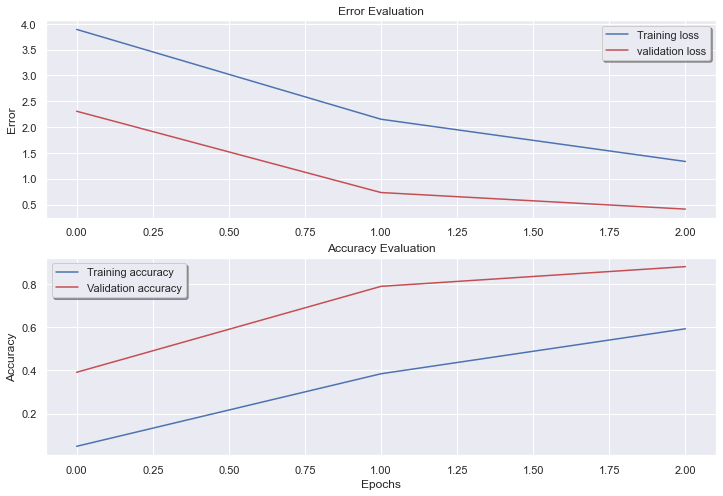

In [11]:
sns.set(rc={'figure.figsize':(12,8)})
fig, ax = plt.subplots(2,1)
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Accuracy Evaluation')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epochs')
legend = ax[1].legend(loc='best', shadow=True)

ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Error Evaluation')
ax[0].set_ylabel('Error')
legend = ax[0].legend(loc='best', shadow=True)


In [12]:
data = pd.read_csv("../CSV datasets/Baybayin(Final).csv")
classLabels = data['letter'].unique()

In [24]:
from sklearn.metrics import classification_report
predictions = baybayin_recognition_model.predict(validation_generator, batch_size=32)
#print(classification_report(total_validate.argmax(axis=1),
#                            predictions.argmax(axis=1), target_names=classLabels))

In [14]:
notebook_path = os.path.abspath('try1.ipynb')

In [40]:
# put all the needed variable/parameter
file_name = 'image_to_test.jpg'
image_path = os.path.dirname(notebook_path)+'/'+file_name

image_to_test = cv2.imread(image_path, cv2.IMREAD_COLOR)

#convert to grayscale
gray = cv2.cvtColor(image_to_test, cv2.COLOR_BGR2GRAY)
#blurring the image
blur = cv2.GaussianBlur(gray, (5, 5), 0)

#apply edge filter to the blurred image
edge = cv2.Canny(blur, 30, 150)

In [41]:
from imutils import resize, grab_contours
#get contours
cntrs = cv2.findContours(edge.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cntrs = grab_contours(cntrs)

#sort contours from top left to bottom right
boundingBox = [cv2.boundingRect(c) for c in cntrs]
(cntrs, _) = zip(*sorted(zip(cntrs, boundingBox), key=lambda x: (-x[1][1], x[1][0])))

In [42]:
image_size = (32, 32)

In [43]:
char_detected = []

for c in cntrs:
    (x,y,w,h) = cv2.boundingRect(c)
    
    #attemp to ignore small contours
    if (w >= 5 and w <= 350) and (h >= 15 and h <= 320):
        #create an Region of Interest
        roi = gray[y:y+h, x:x+w]
        
        #threshold it to make it into binary image
        bin_img = cv2.threshold(roi, 0 ,255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        (iH, iW) = bin_img.shape
        
        #if imageWidth(iW) is bigger than the Height, then we will scale the image until
        #the width is equal to 32, else scale the image until we got the height is the 32
        #32 used in here is based on the image_size which is (32,32)
        if iW > iH:
            bin_img = resize(bin_img, width = image_size[0])
        else:
            bin_img = resize(bin_img, height = image_size[1])
            
        #update with the new image size
        (iH, iW) = bin_img.shape
        dX = int(max(0, 32 - iW) / 2.0)
        dY = int(max(0, 32 - iH) / 2.0)
        
        #pad the image and resize it to match the input of the model
        padded = cv2.copyMakeBorder(bin_img, top=dY, bottom=dY,
            left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
            value=(0, 0, 0))
        padded = cv2.resize(padded, image_size)
        
        #normalize the image so that it got the same value of testImg
        padded = padded.astype("float32") / 255.0
        padded = np.expand_dims(padded, axis=-1)
        
        #put it into list of the queue of images to predict
        char_detected.append([padded, (x, y, w, h)])
        
#get each location and image of detected char
boxes = [b[1] for b in char_detected]
char_detected = np.array([c[0] for c in char_detected], dtype="float32")
#feed it as the input of the model
predictions = baybayin_recognition_model.predict(char_detected)
preds = []
for pred in predictions:
    i = np.argmax(pred)
    prob = pred[i]
    preds.append([classLabels[i], prob])

for (pred, (x, y, w, h)) in zip(preds, boxes):
    #put the result into the image and print it
    print("[DETECTED CHAR] {} - {:.2f}%".format(pred[0], pred[1] * 100))
    cv2.rectangle(image_to_test, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image_to_test, "{}".format(pred[0]), (x - 10, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 2)

#show the result
cv2.imwrite("Image_after_test.jpg", image_to_test)

[DETECTED CHAR] ga - 66.66%
[DETECTED CHAR] na - 26.15%
[DETECTED CHAR] na - 33.35%
[DETECTED CHAR] na - 39.12%
[DETECTED CHAR] na - 38.86%
[DETECTED CHAR] ba - 51.96%
[DETECTED CHAR] na - 93.76%


True

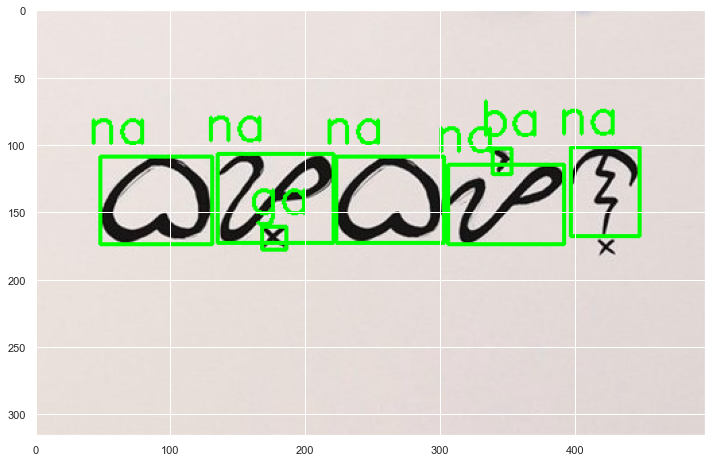

In [44]:
#show the result
plt.imshow(image_to_test)